---
title: 01 - NGS collection [mouse]
author: Martin Proks
date: 16-08-2023
---

![Timepoints were adjusted based on [Saiz and Plusa et al., Reproduction 2013](https://rep.bioscientifica.com/view/journals/rep/145/3/R65.xml)](https://rep.bioscientifica.com/view/journals/rep/145/3/images/large/R65fig1.jpeg)

**Mouse**: 
- ~~[Guo et al., 2010](https://www.sciencedirect.com/science/article/pii/S1534580710001103): qPCR on steroids, complicated, skipping - maybe for prediction, could be interesting)~~
- ~~[Guo et al., 2014](https://www.nature.com/articles/nature13544): Bisulfite-Seq (skipping)~~
- ~~[Ohnishi et al., 2014](https://www.nature.com/articles/ncb2881): Microarray (used in ccmnetplus for validation) *~~

In [1]:
!which pip

/projects/dan1/data/Brickman/conda/envs/scvi-1.0.0/bin/pip


In [2]:
import anndata
import pandas as pd
import scanpy as sc
import pandas as pd
import seaborn as sns


def load_experiment(filename: str, GEO: str, left_on: str = 'sample', right_on='SRX'):
    adata = sc.read(filename)
    metadata = pd.read_csv(f"../pipeline/fetchngs/{GEO}_metadata.csv")

    # sometimes we have duplicates because the ID is not unique
    adata.obs = pd.merge(adata.obs, metadata, left_on=left_on, right_on=right_on)\
                    .drop_duplicates(left_on)\
                    .set_index(left_on)

    adata.obs['ct_orig'] = adata.obs['sample_title']

    return adata

In [3]:
%run ../scripts/helpers.py

/projects/dan1/data/Brickman/conda/envs/scvi-1.0.0/lib/python3.10/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/projects/dan1/data/Brickman/conda/envs/scvi-1.0.0/lib/python3.10/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/projects/dan1/data/Brickman/conda/envs/scvi-1.0.0/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
def normalize_smartseq(adata: sc.AnnData, gene_len: pd.DataFrame) -> sc.AnnData:
    print("SMART-SEQ: Normalization")

    common_genes = adata.var_names.intersection(gene_len.index)
    print(f"SMART-SEQ: Common genes {common_genes.shape[0]}")

    lengths = gene_len.loc[common_genes, "length"].values
    normalized = adata[:, common_genes].copy()
    normalized.X = normalized.X / lengths * np.median(lengths)
    normalized.X = np.rint(normalized.X)

    return normalized

In [5]:
# pip install gtftools
# !gtftools \
#     -l ../data/external/Mus_musculus_GRCm38_102_gene_length.txt \
#     /scratch/Brickman/references/mus_musculus/ensembl/GRCm38_102/Mus_musculus.GRCm38.102.gtf

genes_length = pd.read_table("../data/external/Mus_musculus_GRCm38_102_gene_length.txt").set_index('gene')
genes_length['length'] = genes_length['mean']
genes_length

,mean,median,longest_isoform,merged,length
gene,,,,,
ENSMUSG00000102693,1070,1070,1070,1070,1070
ENSMUSG00000064842,110,110,110,110,110
ENSMUSG00000051951,3592,3634,4153,6094,3592
ENSMUSG00000102851,480,480,480,480,480
ENSMUSG00000103377,2819,2819,2819,2819,2819
...,...,...,...,...,...
ENSMUSG00000117740,331,331,331,331,331
ENSMUSG00000117782,1570,1570,1570,1570,1570
ENSMUSG00000117951,256,256,256,256,256


## Datasets

| Dataset                   | Technology    | Download       | Notes                                 |
| ------------------------- | ------------- | -------------- | ------------------------------------- |
| [Deng et al., 2014]       | SMART-seq 1/2 | [GSE45719]     | Done                                  |
| [Biase et al., 2014]      | SMART-seq     | [GSE57249]     | Done                                  |
| [Posfai et al., 2017]     | SMART-seq     | [GSE84892]     | Done                                  |
| [Goolamn et al., 2016]    | SMART-seq2    | [E-MTAB-3321]  | Done                                  |
| [Boroviak et al., 2015]   | SMART-seq2    | [Sup Table S1] | Done                                  |
| [Chen et al., 2016]       | SMART-seq2    | [GSE74155]     | Done                                  |
| [Nowotschin et al., 2019] | 10X v2        | [Portal]       | Done                                  |
| [Fan et al., 2015]        | SUPeR-seq     | [GSE53386]     | Done                                  |
| [Borensztein et al., 2017]| qRT-PCR       | [GSE80810]     | Done                                  |
| [Stirparo et al., 2020]   | SMART-seq2    | [GSE159030]    | Done                                  |
| [Xue et al., 2013]        | qRT-PCR       | [GSE44183]     | Done                                  |
| [Yanagida et al., 2022]   | SMART-seq2    | [GSE148462]    | Done                                  |
| [Mohammed et al., 2017]   | SMART-seq2    | [GSE100597]    | Done                                  |

[Deng et al., 2014]: https://www.science.org/doi/10.1126/science.1245316
[GSE45719]: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE45719
[Nowotschin et al., 2019]: https://www.nature.com/articles/s41586-019-1127-1
[Portal]: https://s3.amazonaws.com/dp-lab-data-public/mouse_endoderm/sc_endoderm_all_cells.h5ad
[Biase et al., 2014]: https://genome.cshlp.org/content/24/11/1787
[GSE57249]: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE57249
[Posfai et al., 2017]: https://elifesciences.org/articles/22906
[GSE84892]: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE84892
[Goolamn et al., 2016]: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4819611/
[E-MTAB-3321]: https://www.ebi.ac.uk/arrayexpress/experiments/E-MTAB-3321/
[Boroviak et al., 2015]: https://www.sciencedirect.com/science/article/pii/S1534580715006589
[Sup Table S1]: https://www.sciencedirect.com/science/article/pii/S1534580715006589
[Chen et al., 2016]: https://genome.cshlp.org/content/26/10/1342.long
[GSE74155]: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE74155
[Fan et al., 2015]: https://genomebiology.biomedcentral.com/articles/10.1186/s13059-015-0706-1
[GSE53386]: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE53386
[Borensztein et al., 2017]: https://www.nature.com/articles/nsmb.3365
[GSE80810]: http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE80810
[Stirparo et al., 2020]: https://www.pnas.org/doi/full/10.1073/pnas.2008890118
[GSE159030]: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE159030
[Xue et al., 2013]: https://www.nature.com/articles/nature12364
[GSE44183]: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE44183
[Yanagida et al., 2022]: https://www.sciencedirect.com/science/article/pii/S0092867422001234
[GSE148462]: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE148462
[Mohammed et al., 2017]: https://www.sciencedirect.com/science/article/pii/S2211124717309610
[GSE100597]: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE100597

### Deng et al., 2014 [GSE45719]


```bash
nf-core_tower.sh \
    Deng_et_al_2014 \
    nextflow run nf-core/fetchngs \
    -r 1.10.0 \
    --input /projects/dan1/data/Brickman/projects/proks-salehin-et-al-2023/pipeline/fetchngs/GSE45719.txt

nf-core_tower.sh Deng_et_al_ALIGNED nextflow run brickmanlab/scrnaseq \
    -r feature/smartseq \
    -c /projects/dan1/data/Brickman/projects/proks-salehin-et-al-2023/pipeline/smartseq.config \
    --protocol smartseq \
    --aligner star \
    --fasta /scratch/Brickman/references/mus_musculus/ensembl/GRCm38_102/Mus_musculus.GRCm38.dna_sm.primary_assembly.fa \
    --gtf /scratch/Brickman/references/mus_musculus/ensembl/GRCm38_102/Mus_musculus.GRCm38.102.gtf \
    --star_index /scratch/Brickman/references/mus_musculus/ensembl/GRCm38_102/star_2.7.10a \
    --input /scratch/Brickman/pipelines/Deng_et_al_2014/results/samplesheet/samplesheet.csv
```

#### Preparation

In [6]:
deng_metadata = pd.read_table("https://ftp.ncbi.nlm.nih.gov/geo/series/GSE45nnn/GSE45719/matrix/GSE45719_series_matrix.txt.gz", 
                              skiprows=30, index_col=0).T

In [7]:
deng_metadata['ct'] = deng_metadata['!Sample_source_name_ch1'].values
deng_metadata['SRX'] = deng_metadata[['!Sample_relation']].agg(' '.join, axis=1).str.extract(r'(SRX[0-9]{6})')
deng_metadata = deng_metadata.reset_index()

In [8]:
legend = {
    '16-cell stage blastomere': '16C', 
    '2-cell stage blastomere': '2C',
    '4-cell stage blastomere': '4C',
    '8-cell stage blastomere': '8C',
    'Early 2-cell stage blastomere (31-32h post-fertilization)': '2C',
    'Early blastocyst cell (86-88h post-fertilization)': 'Blastocyst',
    'Late 2-cell stage blastomere (46-48h post-fertilization)': '2C',
    'Late blastocyst cell (100-102h post-fertilization)': 'Blastocyst',
    'Liver': 'Liver',
    'Liver cell': 'Liver', 
    'Mid 2-cell stage blastomere (34-40h post-fertilization)': '2C',
    'Mid blastocyst cell (92-94h post-fertilization)': 'Blastocyst',
    'Zygote': 'Zygote',
    'fibroblast (primary culture from tail)': 'Fibroblast'
}

for old_name, new_name in legend.items():
    deng_metadata.loc[deng_metadata.ct == old_name, 'ct'] = new_name
deng_metadata.ct = deng_metadata.ct.astype('category')
deng_metadata = deng_metadata.query('ct not in ["Liver", "Blastocyst", "Fibroblast"]').copy()

In [9]:
deng_metadata['index'].to_csv("../pipeline/fetchngs/GSE45719.txt", index=None, header=None)
deng_metadata.set_index('SRX').to_csv("../pipeline/fetchngs/GSE45719_metadata.csv")

#### Load dataset

In [10]:
deng = load_experiment(
    "../data/external/aligned/mouse/Deng_et_al_ALIGNED/results/star/mtx_conversions/combined_matrix.h5ad",
    GEO="GSE45719"
)

In [11]:
deng.obs['experiment'] = "Deng et al., 2014"
deng.obs['technology'] = 'SMART-seq'
deng.obs.loc[deng.obs.sample_alias.isin([f'GSM12780{i:02d}' for i in range(9, 45)]), 'technology'] = 'SMART-seq2'
deng.obs['batch'] = "DENG_1"
deng.obs.loc[deng.obs.technology == 'SMART-seq2', 'batch'] = "DENG_2"
deng.obs = deng.obs[['batch', 'experiment', 'technology', 'ct', 'ct_orig']]

In [12]:
deng = normalize_smartseq(deng, genes_length)

SMART-SEQ: Normalization
SMART-SEQ: Common genes 55364


### Biase et al., 2014 [GSE57249]

```bash
nf-core_tower.sh \
    Biase_et_al \
    nextflow run nf-core/fetchngs \
    -r 1.10.0 \
    --input /projects/dan1/data/Brickman/projects/proks-salehin-et-al-2023/pipeline/fetchngs/GSE57249.txt

nf-core_tower.sh Biase_et_al nextflow run brickmanlab/scrnaseq \
	-r feature/smartseq \
	-c /projects/dan1/data/Brickman/projects/proks-salehin-et-al-2023/pipeline/smartseq.config \
	--input /scratch/Brickman/pipelines/Biase_et_al/results/samplesheet/samplesheet.csv
```

#### Preparation

In [13]:
biase_metadata = pd.concat([
    pd.read_table("https://ftp.ncbi.nlm.nih.gov/geo/series/GSE57nnn/GSE57249/matrix/GSE57249-GPL13112_series_matrix.txt.gz",
                  skiprows=33, index_col=0).T.reset_index().set_index('!Sample_geo_accession'),
    pd.read_table("https://ftp.ncbi.nlm.nih.gov/geo/series/GSE57nnn/GSE57249/matrix/GSE57249-GPL17021_series_matrix.txt.gz",
                  skiprows=33, index_col=0).T.reset_index().set_index('!Sample_geo_accession')
])

In [14]:
biase_metadata['ct'] = biase_metadata['index'].values
biase_metadata['SRX'] = biase_metadata[['!Sample_relation']].agg(' '.join, axis=1).str.extract(r'(SRX[0-9]{6})')
biase_metadata = biase_metadata.reset_index()

In [15]:
legend = {
    'Zygote': 'Zygote',
    'Two-cell': '2C',
    'Four-cell': '4C',
    'Inner cell mass': 'E3.5-ICM',
    'Trophectoderm': 'E3.5-TE'
}

for old_name, new_name in legend.items():
    biase_metadata.loc[biase_metadata.ct.str.startswith(old_name), 'ct'] = new_name
biase_metadata.ct = biase_metadata.ct.astype('category')

In [16]:
biase_metadata['!Sample_geo_accession'].to_csv("../pipeline/fetchngs/GSE57249.txt", index=None, header=None)
biase_metadata.set_index('SRX').to_csv("../pipeline/fetchngs/GSE57249_metadata.csv")

#### Load dataset

In [17]:
biase = load_experiment(
    "../data/external/aligned/mouse/Biase_et_al/results/star/mtx_conversions/combined_matrix.h5ad",
    GEO="GSE57249")

In [18]:
biase.obs['batch'] = "BIASE_1"
biase.obs['experiment'] = "Biase et al., 2014"
biase.obs['technology'] = "SMART-seq2"

biase.obs = biase.obs[['batch', 'experiment', 'technology', 'ct', 'ct_orig']]

In [19]:
biase = normalize_smartseq(biase, genes_length)

SMART-SEQ: Normalization
SMART-SEQ: Common genes 55364


In [20]:
biase

AnnData object with n_obs × n_vars = 56 × 55364
    obs: 'batch', 'experiment', 'technology', 'ct', 'ct_orig'
    var: 'gene_symbol'

### Posfai et al., 2017 [GSE84892]

```bash
nf-core_tower.sh \
    Posfai_et_al \
    nextflow run nf-core/fetchngs \
    -r 1.10.0 \
    --input /projects/dan1/data/Brickman/projects/proks-salehin-et-al-2023/pipeline/fetchngs/GSE84892.txt

nf-core_tower.sh Posfai_et_al nextflow run brickmanlab/scrnaseq \
    -r feature/smartseq \
    -c /projects/dan1/data/Brickman/projects/proks-salehin-et-al-2023/pipeline/smartseq.config \
    --input /scratch/Brickman/pipelines/Posfai_et_al/results/samplesheet/samplesheet.csv
```

#### Preparation

In [21]:
posfai_metadata = pd.read_table("https://ftp.ncbi.nlm.nih.gov/geo/series/GSE84nnn/GSE84892/matrix/GSE84892_series_matrix.txt.gz",
                                skiprows=31, index_col=0).T

In [22]:
posfai_metadata['SRX'] = posfai_metadata[['!Sample_relation']].agg(' '.join, axis=1).str.extract(r'(SRX[0-9]{6})')
posfai_metadata = posfai_metadata.reset_index()

In [23]:
legend = {
    '16': '16C-',
    '32': 'E3.25-',
    '64': 'E3.5-'
}

In [24]:
posfai_metadata['ct'] = 'UNKNOWN'
for old_name, new_name in legend.items():
    posfai_metadata.loc[posfai_metadata.loc[:, '!Sample_characteristics_ch1'].iloc[:, 0].str.contains(old_name), 'ct'] = new_name

posfai_metadata.ct = posfai_metadata.ct + posfai_metadata.loc[:, '!Sample_characteristics_ch1'].iloc[:, 2].str.replace('lineage: ', '')
posfai_metadata = posfai_metadata.query('~ct.str.contains("CO") or ct != "UNKNOWN"').copy()
posfai_metadata.loc[posfai_metadata.ct.str.contains('16C'), 'ct'] = '16C'

In [25]:
posfai_metadata['!Sample_geo_accession'].to_csv("../pipeline/fetchngs/GSE84892.txt", index=None, header=None)
posfai_metadata.set_index('SRX').to_csv("../pipeline/fetchngs/GSE84892_metadata.csv")

#### Load dataset

In [26]:
posfai = sc.read("../data/external/aligned/mouse/Posfai_et_al/results/star/mtx_conversions/combined_matrix.h5ad")
posfai = posfai[~posfai.obs.duplicated()].copy()
posfai_metadata = pd.read_csv("../pipeline/fetchngs/GSE84892_metadata.csv")

posfai.obs = pd.merge(posfai.obs, posfai_metadata, left_on="sample_title", right_on="index").set_index('sample_title')

posfai = posfai[posfai.obs.ct != "E3.25-CO"].copy()

/projects/dan1/data/Brickman/conda/envs/scvi-1.0.0/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [27]:
posfai.obs['batch'] = "POSFAI_1"
posfai.obs['experiment'] = "Posfai et al., 2017"
posfai.obs['technology'] = "SMART-seq2"
posfai.obs['ct_orig'] = posfai.obs['!Sample_characteristics_ch1']

posfai.obs = posfai.obs[['batch', 'experiment', 'technology', 'ct', 'ct_orig']]

In [28]:
posfai = normalize_smartseq(posfai, genes_length)

SMART-SEQ: Normalization
SMART-SEQ: Common genes 55364


In [29]:
posfai

AnnData object with n_obs × n_vars = 261 × 55364
    obs: 'batch', 'experiment', 'technology', 'ct', 'ct_orig'
    var: 'gene_symbol'

### Goolamn et al., 2016 [E-MTAB-3321]	

```bash
nf-core_tower.sh \
    Goolam_et_al \
    nextflow run nf-core/fetchngs \
    -r 1.10.0 \
    --input /projects/dan1/data/Brickman/projects/proks-salehin-et-al-2023/pipeline/fetchngs/E-MTAB-3321.txt

nf-core_tower.sh Goolam_et_al nextflow run brickmanlab/scrnaseq \
    -r feature/smartseq \
    -c /projects/dan1/data/Brickman/projects/proks-salehin-et-al-2023/pipeline/smartseq.config \
    --input /scratch/Brickman/pipelines/Goolam_et_al/results/samplesheet/samplesheet.csv
```

#### Preparation

In [30]:
goolamn_metadata = pd.read_table("https://www.ebi.ac.uk/biostudies/files/E-MTAB-3321/E-MTAB-3321.sdrf.txt")

In [31]:
goolamn_metadata['ct'] = goolamn_metadata['Characteristics[developmental stage]'].values

In [32]:
legend = {
    'cleavage 2-cell' : '2C',
    'cleavage 4-cell': '4C',
    'cleavage 8-cell': '8C',
    'cleavage 16-cell': '16C',
    'cleavage 32-cell': '32C'
}

for old_name, new_name in legend.items():
    goolamn_metadata.loc[goolamn_metadata.ct == old_name, 'ct'] = new_name
goolamn_metadata.ct = goolamn_metadata.ct.astype('category')

goolamn_metadata = goolamn_metadata.query('ct != "32C"').copy()

In [33]:
goolamn_metadata['Comment[ENA_RUN]'].to_csv("../pipeline/fetchngs/E-MTAB-3321.txt", index=None, header=None)
goolamn_metadata.set_index('Comment[ENA_RUN]').to_csv("../pipeline/fetchngs/E-MTAB-3321_metadata.csv")

#### Load dataset

In [34]:
goolam = load_experiment(
    "../data/external/aligned/mouse/Goolam_et_al/results/star/mtx_conversions/combined_matrix.h5ad",
    GEO="E-MTAB-3321", left_on='run_accession', right_on='Comment[ENA_RUN]'
)

In [35]:
goolam.obs['batch'] = [f"GOOLAM_{batch}" for batch in goolam.obs["Characteristics[batch]"].values]
goolam.obs['experiment'] = "Goolamn et al., 2016"
goolam.obs['technology'] = "SMART-seq2"

goolam.obs = goolam.obs[['batch', 'experiment', 'technology', 'ct', 'ct_orig']]

In [36]:
goolam = normalize_smartseq(goolam, genes_length)

SMART-SEQ: Normalization
SMART-SEQ: Common genes 55364


In [37]:
goolam

AnnData object with n_obs × n_vars = 118 × 55364
    obs: 'batch', 'experiment', 'technology', 'ct', 'ct_orig'
    var: 'gene_symbol'

### Boroviak et al., 2015 [E-MTAB-2958] and [E-MTAB-2959]

```bash
nf-core_tower.sh \
    Boroviak_et_al \
    nextflow run nf-core/fetchngs \
    -r 1.10.0 \
    --input /projects/dan1/data/Brickman/projects/proks-salehin-et-al-2023/pipeline/fetchngs/E-MTAB-29589.txt

nf-core_tower.sh Boroviak_et_al nextflow run brickmanlab/scrnaseq \
    -r feature/smartseq \
    -c /projects/dan1/data/Brickman/projects/proks-salehin-et-al-2023/pipeline/smartseq.config \
    --input /scratch/Brickman/pipelines/Boroviak_et_al/results/samplesheet/samplesheet.csv
```

#### Preparation

In [38]:
boroviak_metadata = pd.concat([
    pd.read_table("https://ftp.ebi.ac.uk/biostudies/nfs/E-MTAB-/958/E-MTAB-2958/Files/E-MTAB-2958.sdrf.txt"),
    pd.read_table("https://ftp.ebi.ac.uk/biostudies/nfs/E-MTAB-/959/E-MTAB-2959/Files/E-MTAB-2959.sdrf.txt")
])

In [39]:
boroviak_metadata['ct'] = boroviak_metadata['Extract Name'].values

In [40]:
legend = {
    'E2.5_MOR': '8C',
    'E3.5_ICM': 'E3.5-ICM',
    'E4.5_PrE': 'E4.5-PrE',
    'E4.5_EPI': 'E4.5-EPI',
}

for old_name, new_name in legend.items():
    boroviak_metadata.loc[boroviak_metadata.ct.str.startswith(old_name), 'ct'] = new_name

boroviak_metadata = boroviak_metadata.query('ct in ["8C", "E3.5-ICM", "E4.5-EPI", "E4.5-PrE"]').copy()
boroviak_metadata.ct = boroviak_metadata.ct.astype('category')

In [41]:
boroviak_metadata['Comment[ENA_RUN]'].to_csv("../pipeline/fetchngs/E-MTAB-29589.txt", index=None, header=None)
boroviak_metadata.set_index('Comment[ENA_RUN]').to_csv("../pipeline/fetchngs/E-MTAB-29589_metadata.csv")

#### Load dataset

In [42]:
boroviak = load_experiment(
    "../data/external/aligned/mouse/Boroviak_et_al/results/star/mtx_conversions/combined_matrix.h5ad",
    GEO="E-MTAB-29589", left_on='run_accession', right_on='Comment[ENA_RUN]')

In [43]:
boroviak.obs['batch'] = "BOROVIAK_1"
boroviak.obs['experiment'] = "Boroviak et al., 2015"
boroviak.obs['technology'] = "SMART-seq2"

boroviak.obs = boroviak.obs[['batch', 'experiment', 'technology', 'ct', 'ct_orig']]

In [44]:
boroviak = normalize_smartseq(boroviak, genes_length)

SMART-SEQ: Normalization
SMART-SEQ: Common genes 55364


In [45]:
boroviak

AnnData object with n_obs × n_vars = 12 × 55364
    obs: 'batch', 'experiment', 'technology', 'ct', 'ct_orig'
    var: 'gene_symbol'

### Chen et al., 2016 [GSE74155]

```bash
nf-core_tower.sh \
    Chen_et_al \
    nextflow run nf-core/fetchngs \
    -r 1.10.0 \
    --force_sratools_download \
    --input /projects/dan1/data/Brickman/projects/proks-salehin-et-al-2023/pipeline/fetchngs/GSE74155.txt

nf-core_tower.sh Chen_et_al nextflow run brickmanlab/scrnaseq \
    -r feature/smartseq \
    -c /projects/dan1/data/Brickman/projects/proks-salehin-et-al-2023/pipeline/smartseq.config \
    --input /scratch/Brickman/pipelines/Chen_et_al/results/samplesheet/samplesheet.csv
```

#### Preparation

In [46]:
chen_metadata = pd.read_table("https://ftp.ncbi.nlm.nih.gov/geo/series/GSE74nnn/GSE74155/matrix/GSE74155_series_matrix.txt.gz",
                              skiprows=30, index_col=0).T

In [47]:
chen_metadata['ct'] = chen_metadata['!Sample_characteristics_ch1'].iloc[:, 1].values
chen_metadata['SRX'] = chen_metadata[['!Sample_relation']].agg(' '.join, axis=1).str.extract(r'(SRX[0-9]{6})')
chen_metadata = chen_metadata.reset_index()

In [48]:
legend = {
    'cell type: E3.5 ICM': 'E3.5-ICM',
    'cell type: E4.5 Epiblast': 'E4.5-EPI'
}

for old_name, new_name in legend.items():
    chen_metadata.loc[chen_metadata.ct.str.startswith(old_name), 'ct'] = new_name

chen_metadata = chen_metadata.query('ct in ["E3.5-ICM", "E4.5-EPI"]').copy()
chen_metadata.ct = chen_metadata.ct.astype('category')

In [49]:
chen_metadata['!Sample_geo_accession'].to_csv("../pipeline/fetchngs/GSE74155.txt", index=None, header=None)
chen_metadata.set_index('SRX').to_csv("../pipeline/fetchngs/GSE74155_metadata.csv")

#### Load dataset

In [50]:
chen = load_experiment(
    "../data/external/aligned/mouse/Chen_et_al/results/star/mtx_conversions/combined_matrix.h5ad",
    GEO="GSE74155", left_on='sample_alias', right_on='ID_REF')

In [51]:
chen.obs['batch'] = "CHEN_1"
chen.obs['experiment'] = "Chen et al., 2016"
chen.obs['technology'] = "SMART-seq2"

chen.obs = chen.obs[['batch', 'experiment', 'technology', 'ct', 'ct_orig']]

In [52]:
chen = normalize_smartseq(chen, genes_length)

SMART-SEQ: Normalization
SMART-SEQ: Common genes 55364


In [53]:
chen

AnnData object with n_obs × n_vars = 46 × 55364
    obs: 'batch', 'experiment', 'technology', 'ct', 'ct_orig'
    var: 'gene_symbol'

### Nowotschin et al., 2019 [GSE123046]

```bash
nf-core_tower.sh \
    Nowotschin_et_al \
    nextflow run nf-core/fetchngs \
    -r 1.10.0 \
    --force_sratools_download \
    --input /projects/dan1/data/Brickman/projects/proks-salehin-et-al-2023/pipeline/fetchngs/GSE123046.txt

wget https://raw.githubusercontent.com/10XGenomics/cellranger/master/lib/python/cellranger/barcodes/737K-august-2016.txt ../pipeline/737K-august-2016.txt && gzip ../pipeline/737K-august-2016.txt

nf-core_tower.sh Nowotschin_et_al nextflow run brickmanlab/scrnaseq \
    -r feature/smartseq \
    -c /projects/dan1/data/Brickman/projects/proks-salehin-et-al-2023/pipeline/10X.config \
    --input /scratch/Brickman/pipelines/Nowotschin_et_al/results/samplesheet/samplesheet.csv
```

#### Preparation

In [54]:
nowotschin_metadata = pd.read_table("https://ftp.ncbi.nlm.nih.gov/geo/series/GSE123nnn/GSE123046/matrix/GSE123046_series_matrix.txt.gz",
                                    skiprows=41, index_col=0).T

In [55]:
nowotschin_metadata['ct'] = nowotschin_metadata.index
nowotschin_metadata['SRX'] = nowotschin_metadata[['!Sample_relation']].agg(' '.join, axis=1).str.extract(r'(SRX[0-9]{6})')
nowotschin_metadata = nowotschin_metadata.reset_index()

In [56]:
nowotschin_metadata = nowotschin_metadata[nowotschin_metadata.ct.str.startswith(("E3", "E4"))].copy()

In [57]:
nowotschin_metadata['!Sample_geo_accession'].to_csv("../pipeline/fetchngs/GSE123046.txt", index=None, header=None)
nowotschin_metadata.set_index('SRX').to_csv("../pipeline/fetchngs/GSE123046_metadata.csv")

#### Load dataset

In [58]:
def nowotschin_get_metadata():
    metadata = pd.read_csv("https://s3.amazonaws.com/dp-lab-data-public/mouse_endoderm/sc_endoderm_all_cells_metadata.csv", index_col=0)
    correction = pd.read_csv("../data/external/aligned/mouse/Nowotschin_et_al/e35_cell_types.csv", index_col=0)

    metadata.loc[correction.index, 'CellType'] = correction.CellType

    return metadata

In [59]:
nowotschin = sc.read("../data/external/aligned/mouse/Nowotschin_et_al/results/star/mtx_conversions/combined_matrix.h5ad")

legend = {
    'E4.5_Rep1': 'Lib1-1_E4.5',
    'E4.5_Rep2': 'Lib1-2_E4.5',
    'E3.5_Rep1': 'Lib1-3_E3.5',
    'E3.5_Rep2': 'Lib1-4_E3.5',
}

nowotschin.obs['Library'] = 'UNKNOWN'
for old_name, new_name in legend.items():
    nowotschin.obs.loc[nowotschin.obs['sample_title'] == old_name, 'Library'] = new_name

nowotschin.obs['cell_id'] = nowotschin.obs['Library'] + "_" + nowotschin.obs_names.str.split('_', expand=True).droplevel(1)
nowotschin.obs['timepoint'] = nowotschin.obs.sample_title.str.split('_', expand=True).values[:, 0]
nowotschin.obs = nowotschin.obs.set_index('cell_id')

In [60]:
nowotschin_metadata = nowotschin_get_metadata()

In [61]:
nowotschin = nowotschin[nowotschin.obs_names.intersection(nowotschin_metadata.index)].copy()
nowotschin_metadata = nowotschin_metadata.loc[nowotschin.obs_names].copy()

In [62]:
nowotschin.obs['batch'] = "NOWO_1"
nowotschin.obs.loc[nowotschin.obs['timepoint'].str.startswith('E4.5'), 'batch'] = "NOWO_2"
# nowotschin.obs['batch'] = nowotschin.obs['Library'].replace({
#     'Lib1-1_E4.5': 'NOWO_1', 
#     'Lib1-2_E4.5': 'NOWO_2',
#     'Lib1-3_E3.5': 'NOWO_3',
#     'Lib1-4_E3.5': 'NOWO_4', 
# })
nowotschin.obs['experiment'] = "Nowotschin et al., 2019"
nowotschin.obs['technology'] = "10X 3' v2"
nowotschin.obs['ct'] = nowotschin_metadata[['Timepoint', 'CellType']].agg('-'.join, axis=1)
nowotschin.obs['ct_orig'] = nowotschin_metadata['CellType']

nowotschin.obs = nowotschin.obs[['batch', 'experiment', 'technology', 'ct', 'ct_orig']]

### Fan et al., 2015 [GSE53386]

```bash
nf-core_tower.sh \
    Fan_et_al \
    nextflow run nf-core/fetchngs \
    -r 1.10.0 \
    --force_sratools_download \
    --input /projects/dan1/data/Brickman/projects/proks-salehin-et-al-2023/pipeline/fetchngs/GSE53386.txt

nf-core_tower.sh Fan_et_al nextflow run brickmanlab/scrnaseq \
    -r feature/smartseq \
    -c /projects/dan1/data/Brickman/projects/proks-salehin-et-al-2023/pipeline/smartseq.config \
    --input /scratch/Brickman/pipelines/Fan_et_al/results/samplesheet/samplesheet.csv
```

#### Preparation

In [63]:
fan_metadata = pd.read_table("https://ftp.ncbi.nlm.nih.gov/geo/series/GSE53nnn/GSE53386/matrix/GSE53386-GPL13112_series_matrix.txt.gz", 
                      skiprows=33, index_col=0).T
fan_metadata['SRX'] = fan_metadata[['!Sample_relation']].agg(' '.join, axis=1).str.extract(r'(SRX[0-9]{6})')

In [64]:
fan_metadata['ct'] = fan_metadata['!Sample_characteristics_ch1'].iloc[:, 0].values
fan_metadata = fan_metadata.reset_index()

In [65]:
legend = {
    'cell type: zygote': 'Zygote',
    'cell type: 2-cell embryo': '2C',
    'cell type: 4-cell embryo': '4C',
    'cell type: 8-cell embryo': '8C', 
    'cell type: morula': '16C',
}

In [66]:
for old_name, new_name in legend.items():
    fan_metadata.loc[fan_metadata.ct == old_name, 'ct'] = new_name
    
fan_metadata = fan_metadata[fan_metadata.ct.isin(legend.values())].copy()

In [67]:
fan_metadata['!Sample_geo_accession'].to_csv("../pipeline/fetchngs/GSE53386.txt", index=None, header=None)
fan_metadata.set_index('SRX').to_csv("../pipeline/fetchngs/GSE53386_metadata.csv")

#### Load dataset

In [68]:
fan = load_experiment(
    "../data/external/aligned/mouse/Fan_et_al/results/star/mtx_conversions/combined_matrix.h5ad",
    GEO="GSE53386"
)

In [69]:
fan.obs['batch'] = "FAN_1"
fan.obs['experiment'] = "Fan et al., 2015"
fan.obs['technology'] = "SUPeR-seq"

fan.obs = fan.obs[['batch', 'experiment', 'technology', 'ct', 'ct_orig']]

In [70]:
fan = normalize_smartseq(fan, genes_length)

SMART-SEQ: Normalization
SMART-SEQ: Common genes 55364


In [71]:
fan

AnnData object with n_obs × n_vars = 27 × 55364
    obs: 'batch', 'experiment', 'technology', 'ct', 'ct_orig'
    var: 'gene_symbol'

### Borensztein et al., 2017 [GSE80810]

```bash
nf-core_tower.sh \
    Borensztein_et_al \
    nextflow run nf-core/fetchngs \
    -r 1.10.0 \
    --input /projects/dan1/data/Brickman/projects/proks-salehin-et-al-2023/pipeline/fetchngs/GSE80810.txt

nf-core_tower.sh Borensztein_et_al nextflow run brickmanlab/scrnaseq \
    -r feature/smartseq \
    -c /projects/dan1/data/Brickman/projects/proks-salehin-et-al-2023/pipeline/smartseq.config \
    --input /scratch/Brickman/pipelines/Borensztein_et_al/results/samplesheet/samplesheet.csv
```

#### Preparation

In [72]:
borenszrtein_metadata = pd.read_table("https://ftp.ncbi.nlm.nih.gov/geo/series/GSE80nnn/GSE80810/matrix/GSE80810_series_matrix.txt.gz",
                                      skiprows=31, index_col=0).T
borenszrtein_metadata['SRX'] = borenszrtein_metadata[['!Sample_relation']].iloc[:, :2].agg(' '.join, axis=1).str.extract(r'(SRX[0-9]{6})')

In [73]:
borenszrtein_metadata['ct'] = borenszrtein_metadata['!Sample_characteristics_ch1'].iloc[:, 1].values
borenszrtein_metadata = borenszrtein_metadata.reset_index()

In [74]:
legend = {
    # 'developmental stage: Oocyte': 'Oocyte',
    'developmental stage: 2-cell': '2C',
    'developmental stage: 4-cell': '4C',
    'developmental stage: 8-cell': '8C',
    'developmental stage: 16-cell': '16C',
    # 'developmental stage: 32-cell': 'UNKNOWN',
    # 'developmental stage: 64-cell': 'UNKNOWN'
}

for old_name, new_name in legend.items():
    borenszrtein_metadata.loc[borenszrtein_metadata.ct == old_name, 'ct'] = new_name
    
borenszrtein_metadata = borenszrtein_metadata[borenszrtein_metadata.ct.isin(legend.values())].copy()
borenszrtein_metadata = borenszrtein_metadata[borenszrtein_metadata['!Sample_characteristics_ch1'].iloc[:, 2].str.contains('wt/wt')].copy()

In [75]:
borenszrtein_metadata['!Sample_geo_accession'].to_csv("../pipeline/fetchngs/GSE80810.txt", index=None, header=None)
borenszrtein_metadata.set_index('SRX').to_csv("../pipeline/fetchngs/GSE80810_metadata.csv")

#### Load dataset

In [76]:
borensztein = load_experiment(
    "../data/external/aligned/mouse/Borensztein_et_al/results/star/mtx_conversions/combined_matrix.h5ad",
    GEO="GSE80810", left_on='sample_alias', right_on='ID_REF'
)

In [77]:
borensztein.obs['batch'] = "BORENSZTEIN_1"
borensztein.obs['experiment'] = "Borensztein et al., 2017"
borensztein.obs['technology'] = "qRT-PCR"

borensztein.obs = borensztein.obs[['batch', 'experiment', 'technology', 'ct', 'ct_orig']]

In [78]:
borensztein = normalize_smartseq(borensztein, genes_length)

SMART-SEQ: Normalization
SMART-SEQ: Common genes 55364


In [79]:
borensztein

AnnData object with n_obs × n_vars = 60 × 55364
    obs: 'batch', 'experiment', 'technology', 'ct', 'ct_orig'
    var: 'gene_symbol'

### Stirparo et al., 2020 [GSE159030]

```bash
nf-core_tower.sh \
    Stirparo_et_al \
    nextflow run nf-core/fetchngs \
    -r 1.10.0 \
    --force_sratools_download \
    --input /projects/dan1/data/Brickman/projects/proks-salehin-et-al-2023/pipeline/fetchngs/GSE159030.txt

nf-core_tower.sh Stirparo_et_al nextflow run brickmanlab/scrnaseq \
    -r feature/smartseq \
    -c /projects/dan1/data/Brickman/projects/proks-salehin-et-al-2023/pipeline/smartseq.config \
    --input /scratch/Brickman/pipelines/Stirparo_et_al/results/samplesheet/samplesheet.csv
```

#### Preparation

In [80]:
stirparo_metadata = pd.read_table("https://ftp.ncbi.nlm.nih.gov/geo/series/GSE159nnn/GSE159030/matrix/GSE159030_series_matrix.txt.gz",
                                  skiprows=27, index_col=0).T
stirparo_metadata['SRX'] = stirparo_metadata[['!Sample_relation']].agg(' '.join, axis=1).str.extract(r'(SRX[0-9]{6})')

In [81]:
stirparo_metadata['ct'] = stirparo_metadata['!Sample_source_name_ch1']
stirparo_metadata = stirparo_metadata.reset_index()

In [82]:
legend = {
    'Primitive Endoderm': 'PrE',
    'Epiblast': 'EPI',
}

for old_name, new_name in legend.items():
    stirparo_metadata.loc[stirparo_metadata.ct == old_name, 'ct'] = new_name

stirparo_metadata['ct'] = stirparo_metadata['!Sample_characteristics_ch1'].iloc[:, 1].str.replace('developmental stage: ', '').astype(str)\
                        + '-' + stirparo_metadata.ct
stirparo_metadata = stirparo_metadata[stirparo_metadata['!Sample_characteristics_ch1'].iloc[:, 0] == 'genotype: Wild-Type'].copy()

In [83]:
stirparo_metadata['!Sample_geo_accession'].to_csv("../pipeline/fetchngs/GSE159030.txt", index=None, header=None)
stirparo_metadata.set_index('SRX').to_csv("../pipeline/fetchngs/GSE159030_metadata.csv")

#### Load dataset

In [84]:
stirparo = load_experiment(
    "../data/external/aligned/mouse/Stirparo_et_al/results/star/mtx_conversions/combined_matrix.h5ad",
    GEO="GSE159030", left_on='sample_alias', right_on='ID_REF'
)

In [85]:
stirparo.obs['batch'] = "STIRPARO_1"
stirparo.obs['experiment'] = "Stirparo et al., 2020"
stirparo.obs['technology'] = "SMART-seq2"

stirparo.obs = stirparo.obs[['batch', 'experiment', 'technology', 'ct', 'ct_orig']]

In [86]:
stirparo = normalize_smartseq(stirparo, genes_length)

SMART-SEQ: Normalization
SMART-SEQ: Common genes 55364


In [87]:
stirparo

AnnData object with n_obs × n_vars = 64 × 55364
    obs: 'batch', 'experiment', 'technology', 'ct', 'ct_orig'
    var: 'gene_symbol'

### Xue et al., 2013 [GSE44183]

```bash
nf-core_tower.sh \
    Xue_et_al \
    nextflow run nf-core/fetchngs \
    -r 1.10.0 \
    --input /projects/dan1/data/Brickman/projects/proks-salehin-et-al-2023/pipeline/fetchngs/GSE44183.txt

nf-core_tower.sh Xue_et_al nextflow run brickmanlab/scrnaseq \
    -r feature/smartseq \
    -c /projects/dan1/data/Brickman/projects/proks-salehin-et-al-2023/pipeline/smartseq.config \
    --input /scratch/Brickman/pipelines/Xue_et_al/results/samplesheet/samplesheet.csv
```

#### Preparation

In [88]:
xue_metadata = pd.read_table("https://ftp.ncbi.nlm.nih.gov/geo/series/GSE44nnn/GSE44183/matrix/GSE44183-GPL13112_series_matrix.txt.gz",
                               skiprows=35, index_col=0).T
xue_metadata['SRX'] = xue_metadata[['!Sample_relation']].agg(' '.join, axis=1).str.extract(r'(SRX[0-9]{6})')

In [89]:
xue_metadata['ct'] = xue_metadata['!Sample_source_name_ch1']
xue_metadata = xue_metadata.reset_index()

In [90]:
legend = {
    # 'oocyte', : '',
    # 'pronucleus': '',
    '2-cell blastomere': '2C', 
    '4-cell blastomere': '4C',
    '8-cell blastomere': '8C', 
    'morula': '16C'
}

for old_name, new_name in legend.items():
    xue_metadata.loc[xue_metadata.ct == old_name, 'ct'] = new_name

xue_metadata = xue_metadata[xue_metadata.ct.isin(legend.values())].copy()

In [91]:
xue_metadata['!Sample_geo_accession'].to_csv("../pipeline/fetchngs/GSE44183.txt", index=None, header=None)
xue_metadata.set_index('SRX').to_csv("../pipeline/fetchngs/GSE44183_metadata.csv")

#### Load dataset

In [92]:
xue = load_experiment(
    "../data/external/aligned/mouse/Xue_et_al/results/star/mtx_conversions/combined_matrix.h5ad",
    GEO="GSE44183"
)

In [93]:
xue.obs['batch'] = "XUE_1"
xue.obs['experiment'] = "Xue et al., 2013"
xue.obs['technology'] = "qRT-PCR"

xue.obs = xue.obs[['batch', 'experiment', 'technology', 'ct', 'ct_orig']]

In [94]:
xue = normalize_smartseq(xue, genes_length)

SMART-SEQ: Normalization
SMART-SEQ: Common genes 55364


In [95]:
xue

AnnData object with n_obs × n_vars = 12 × 55364
    obs: 'batch', 'experiment', 'technology', 'ct', 'ct_orig'
    var: 'gene_symbol'

### Yanagida et al., 2022 [GSE148462]

```bash
nf-core_tower.sh \
    Yanagida_et_al \
    nextflow run nf-core/fetchngs \
    -r 1.10.0 \
    --force_sratools_download \
    --input /projects/dan1/data/Brickman/projects/proks-salehin-et-al-2023/pipeline/fetchngs/GSE148462.txt

nf-core_tower.sh Yanagida_et_al nextflow run brickmanlab/scrnaseq \
    -r feature/smartseq \
    -c /projects/dan1/data/Brickman/projects/proks-salehin-et-al-2023/pipeline/smartseq.config \
    --input /scratch/Brickman/pipelines/Yanagida_et_al/results/samplesheet/samplesheet.csv
```

#### Preparation

In [96]:
yanagida_metadata = pd.read_table("https://ftp.ncbi.nlm.nih.gov/geo/series/GSE148nnn/GSE148462/matrix/GSE148462_series_matrix.txt.gz",
                                  skiprows=29, index_col=0).T
yanagida_metadata['SRX'] = yanagida_metadata[['!Sample_relation']].agg(' '.join, axis=1).str.extract(r'(SRX[0-9]{6})')

In [97]:
yanagida_metadata['ct'] = 'E3.75-ICM'

In [98]:
yanagida_metadata['!Sample_geo_accession'].to_csv("../pipeline/fetchngs/GSE148462.txt", index=None, header=None)
yanagida_metadata.set_index('SRX').to_csv("../pipeline/fetchngs/GSE148462_metadata.csv")

#### Load dataset

In [99]:
yanagida = load_experiment(
    "../data/external/aligned/mouse/Yanagida_et_al/results/star/mtx_conversions/combined_matrix.h5ad",
    GEO="GSE148462", left_on='sample_alias', right_on='ID_REF'
)

In [100]:
yanagida.obs['batch'] = "YANAGIDA_1"
yanagida.obs['experiment'] = "Yanagida et al., 2022"
yanagida.obs['technology'] = "SMART-seq2"

yanagida.obs = yanagida.obs[['batch', 'experiment', 'technology', 'ct', 'ct_orig']]

In [101]:
yanagida = normalize_smartseq(yanagida, genes_length)

SMART-SEQ: Normalization
SMART-SEQ: Common genes 55364


In [102]:
yanagida

AnnData object with n_obs × n_vars = 48 × 55364
    obs: 'batch', 'experiment', 'technology', 'ct', 'ct_orig'
    var: 'gene_symbol'

## Mohammed et al., 2017 [GSE100597]

```bash
nf-core_tower.sh \
    Mohammed_et_al \
    nextflow run nf-core/fetchngs \
    -r 1.10.0 \
    --input /projects/dan1/data/Brickman/projects/proks-salehin-et-al-2023/pipeline/fetchngs/GSE100597.txt

nf-core_tower.sh Mohammed_et_al nextflow run brickmanlab/scrnaseq \
    -r feature/smartseq \
    -c /projects/dan1/data/Brickman/projects/proks-salehin-et-al-2023/pipeline/smartseq.config \
    --input /scratch/Brickman/pipelines/Mohammed_et_al/results/samplesheet/samplesheet.csv
```

### Preparation

In [103]:
mohammed_metadata = pd.read_table("https://ftp.ncbi.nlm.nih.gov/geo/series/GSE100nnn/GSE100597/matrix/GSE100597_series_matrix.txt.gz",
                                  skiprows=27, index_col=0).T
mohammed_metadata['SRX'] = mohammed_metadata[['!Sample_relation']].agg(' '.join, axis=1).str.extract(r'(SRX[0-9]{6})')

In [104]:
mohammed_metadata = mohammed_metadata[mohammed_metadata['!Sample_source_name_ch1'].isin(['E3.5', 'E4.5'])]
mohammed_metadata = mohammed_metadata[mohammed_metadata.index.str.endswith('single')].copy()

In [105]:
mohammed_metadata['!Sample_geo_accession'].to_csv("../pipeline/fetchngs/GSE100597.txt", index=None, header=None)
mohammed_metadata.set_index('SRX').to_csv("../pipeline/fetchngs/GSE100597_metadata.csv")

### Load data

In [106]:
mohammed = load_experiment(
    "../data/external/aligned/mouse/Mohammed_et_al/results/star/mtx_conversions/combined_matrix.h5ad",
    GEO="GSE100597", left_on='sample_alias', right_on='ID_REF'
)

In [107]:
mohammed_metadata = pd.read_table("../data/external/aligned/mouse/Mohammed_et_al/Cell_clusters.txt", index_col=0)
mohammed_metadata.Lineage = mohammed_metadata.Lineage.str.replace('epiblast', 'EPI').str.replace('PE', 'PrE')
mohammed.obs['ct'] = mohammed_metadata.loc[mohammed.obs.ct_orig, ['Stage', 'Lineage']].agg('-'.join, axis=1).values
mohammed = mohammed[mohammed.obs.ct != 'E4.5-interm'].copy()

In [108]:
mohammed.obs['batch'] = "MOHAMMED_1"
mohammed.obs['experiment'] = "Mohammed et al., 2017"
mohammed.obs['technology'] = "SMART-seq2"

mohammed.obs = mohammed.obs[['batch', 'experiment', 'technology', 'ct', 'ct_orig']]

In [109]:
mohammed = normalize_smartseq(mohammed, genes_length)

SMART-SEQ: Normalization
SMART-SEQ: Common genes 55364


In [110]:
mohammed

AnnData object with n_obs × n_vars = 153 × 55364
    obs: 'batch', 'experiment', 'technology', 'ct', 'ct_orig'
    var: 'gene_symbol'

## Integration

In [111]:
import urllib.request, json

cc_url = "https://github.com/brickmanlab/project-template/raw/master/%7B%7B%20cookiecutter.project_name%20%7D%7D/data/external/mouse_cell_cycle_genes.json"
with urllib.request.urlopen(cc_url) as url:
    cc_dict = json.load(url)
    cc = sum(list(cc_dict.values()), [])

In [112]:
adata = anndata.concat([deng, biase, posfai, goolam, boroviak, chen, nowotschin, fan, borensztein, stirparo, xue, yanagida, mohammed])
adata.obs['stage'] = adata.obs.ct.str.replace('E3.25-|E3.5-|E3.75-|E4.5-', '', regex=True)
adata.obs['timepoint'] = adata.obs.ct.str.split('-', expand=True).iloc[:, 0]
adata.obs.ct = pd.Categorical(adata.obs.ct, 
                              categories=['Zygote', '2C', '4C', '8C', '16C', 
                                          'E3.25-ICM', 'E3.25-TE', 
                                          'E3.5-ICM', 'E3.5-TE', 'E3.5-EPI', 'E3.5-PrE', 
                                          'E3.75-ICM', 
                                          'E4.5-TE', 'E4.5-EPI', 'E4.5-PrE'],
                              ordered=True)
adata.obs_names_make_unique()

adata.var['gene_ids'] = adata.var_names
adata.var['gene_symbol'] = deng[:, adata.var_names].var['gene_symbol'].values
adata.var.index = adata.var.gene_symbol.str.lower().values
adata.var_names_make_unique()

# remove ribosomal genes
adata = adata[:, ~np.logical_or(adata.var_names.str.startswith(('rps','rpl')), adata.var_names == "ct010467.1")].copy()

# remove cc genes
adata = adata[:, ~adata.var_names.isin(cc)].copy()

adata

AnnData object with n_obs × n_vars = 2022 × 54940
    obs: 'batch', 'experiment', 'technology', 'ct', 'ct_orig', 'stage', 'timepoint'
    var: 'gene_ids', 'gene_symbol'

Number of MITO genes: 0
Number of ERCC genes: 0
Number of RIBO genes: 0


### Number of cells per experiment

/projects/dan1/data/Brickman/conda/envs/scvi-1.0.0/lib/python3.10/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


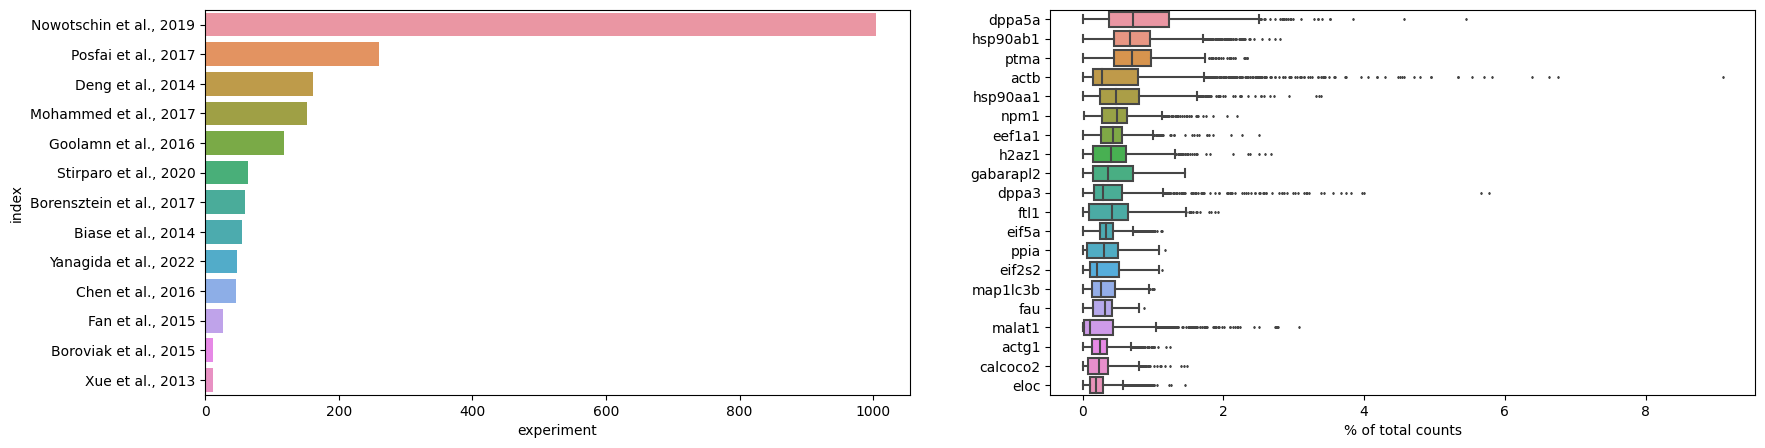

### Number of cells cell type

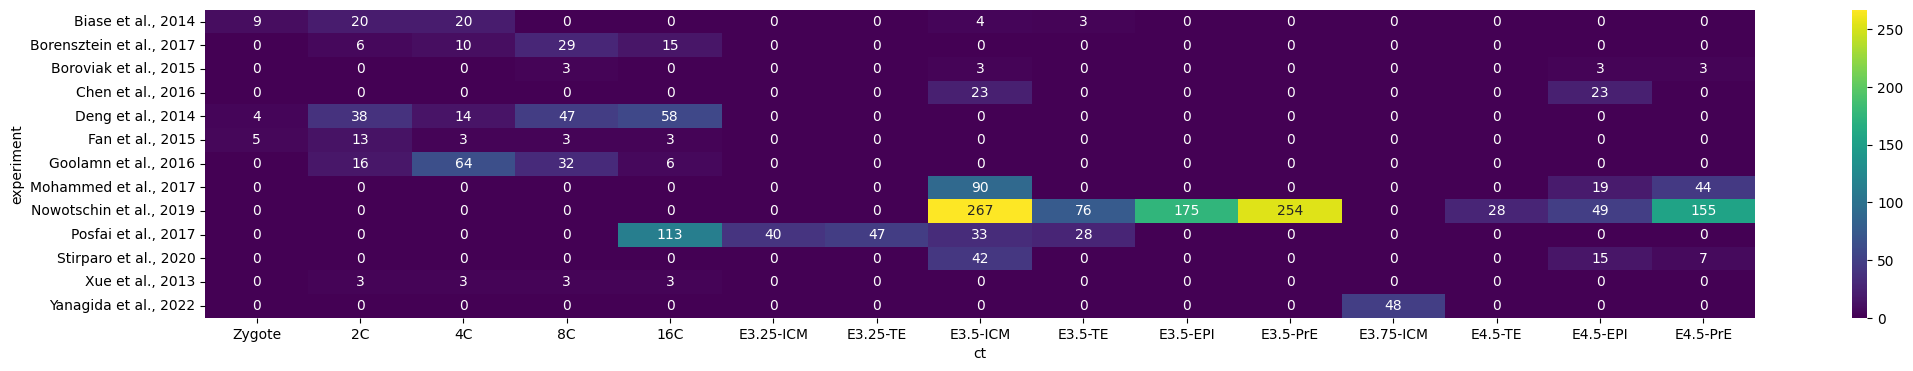

### QC plots

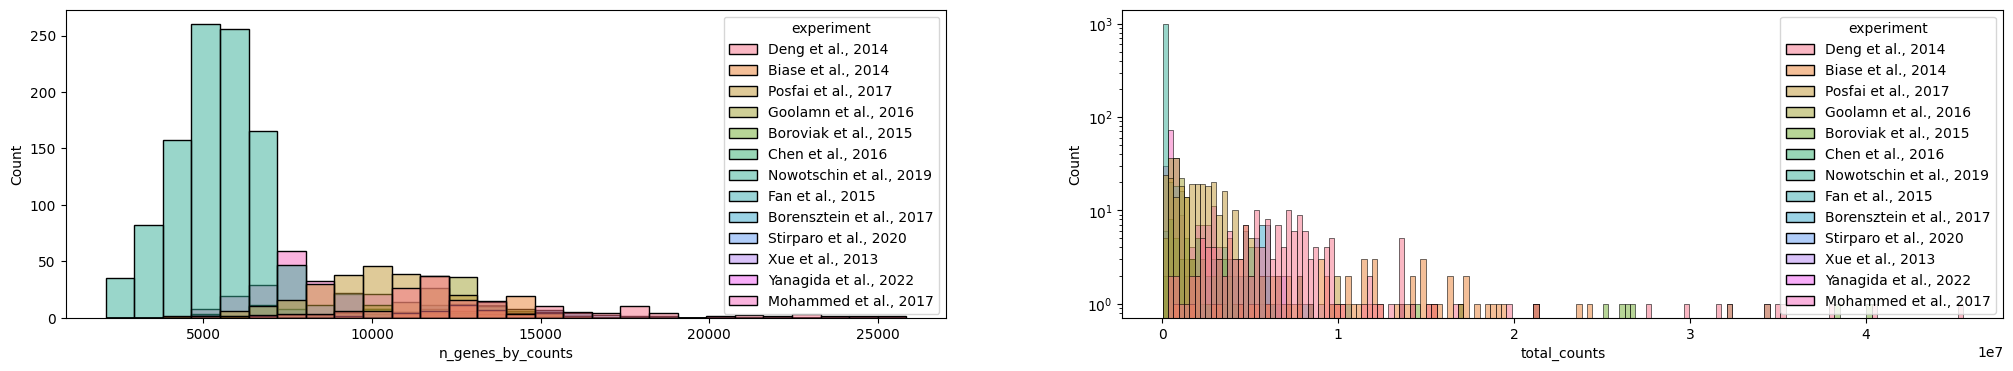

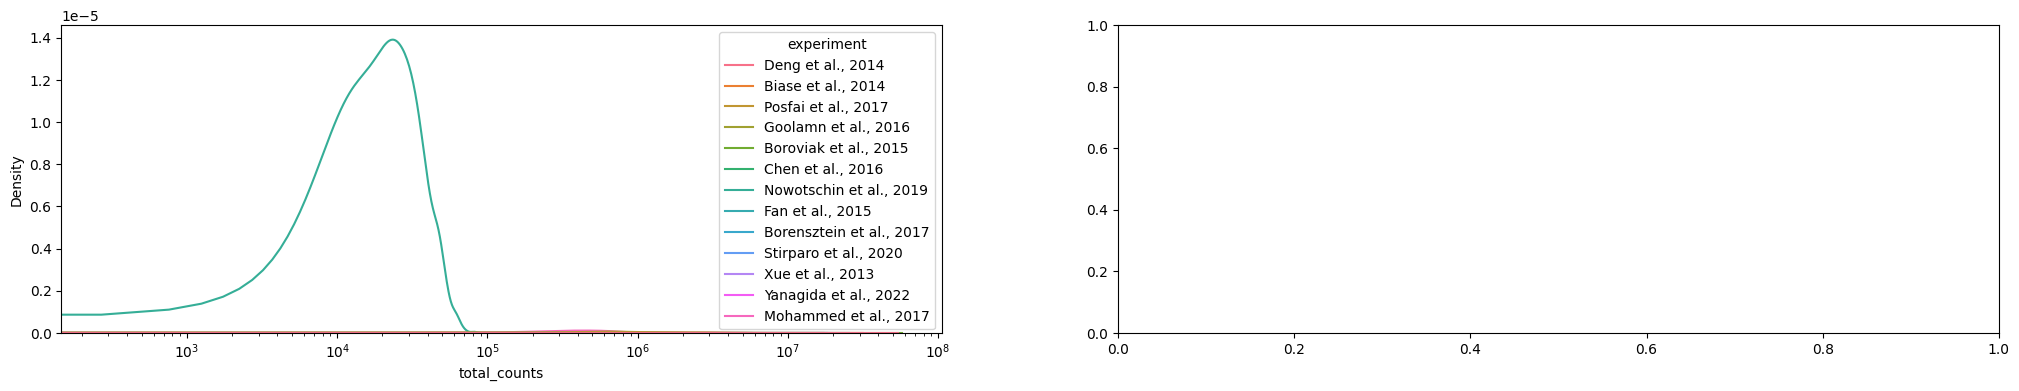

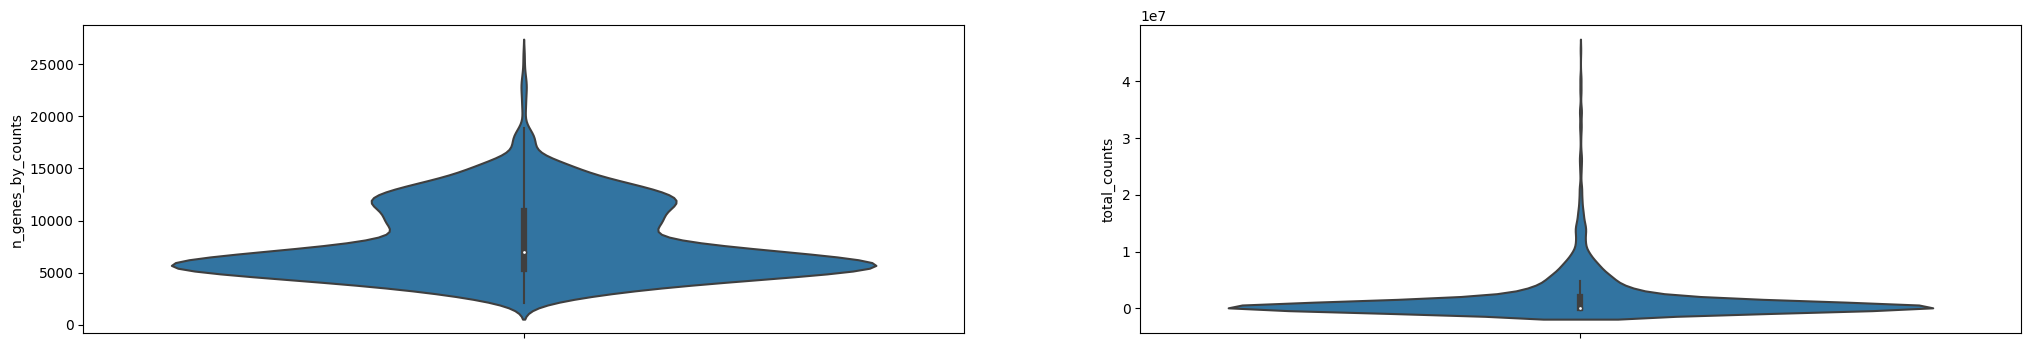

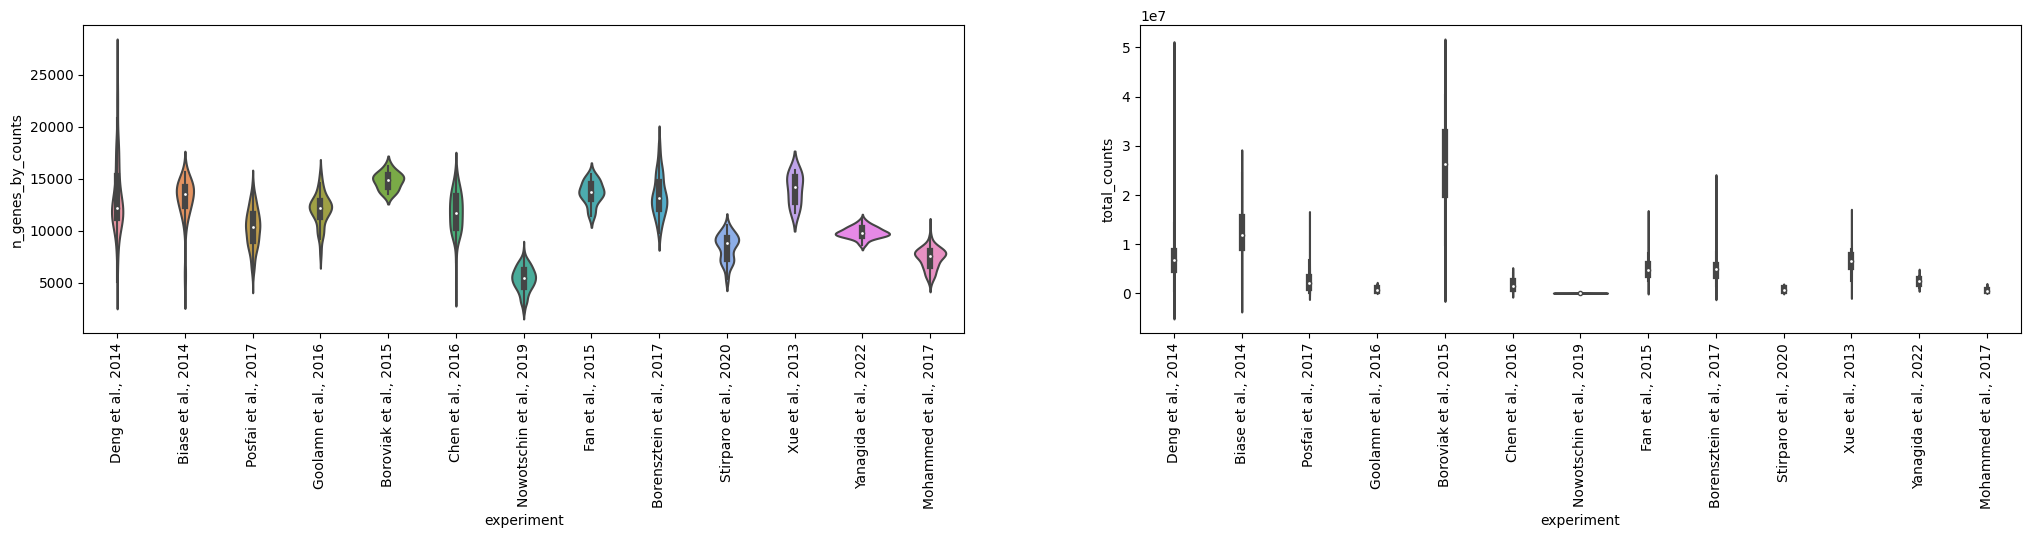

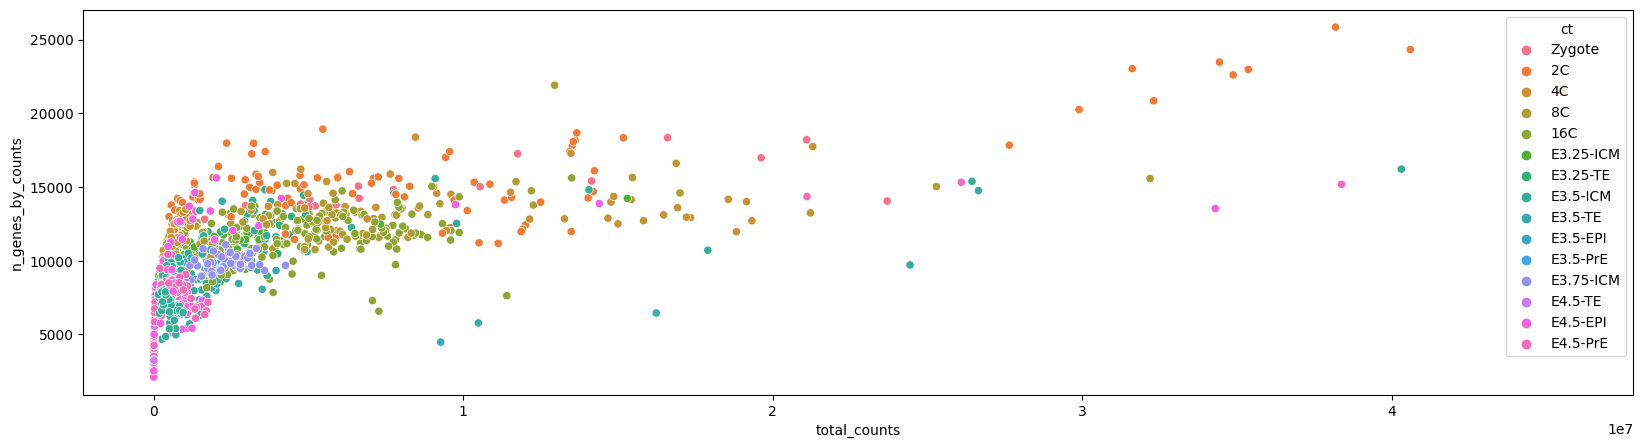

In [113]:
get_summary(adata)

## Final adjustments

In [114]:
adata

AnnData object with n_obs × n_vars = 2022 × 54940
    obs: 'batch', 'experiment', 'technology', 'ct', 'ct_orig', 'stage', 'timepoint', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'gene_symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

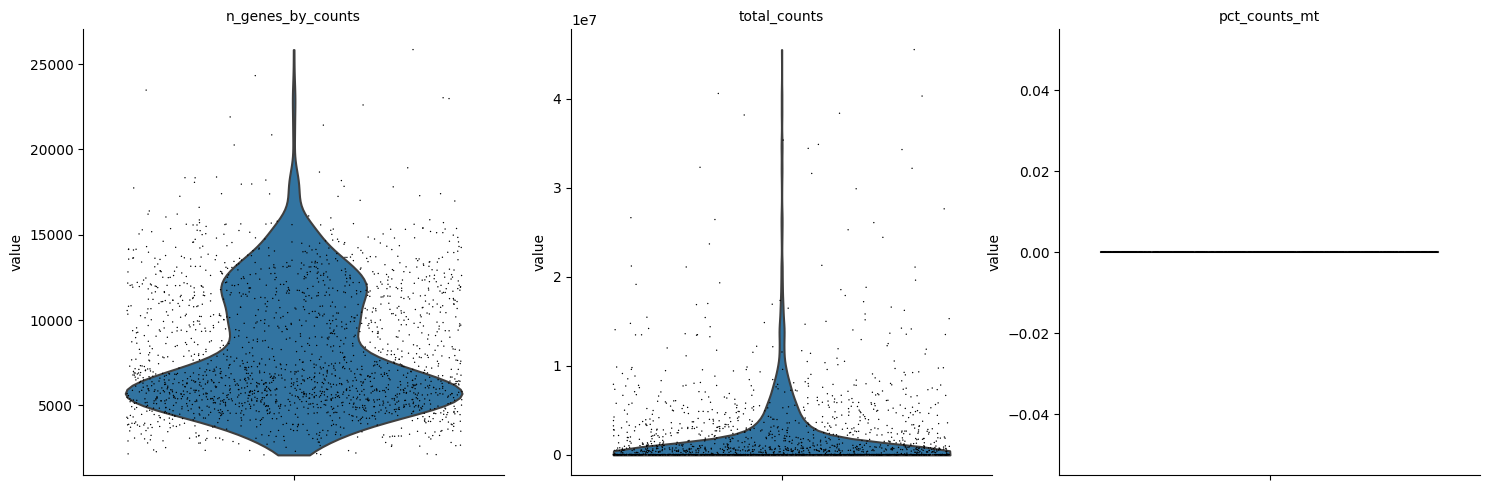

In [115]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

In [116]:
sc.pp.filter_genes(adata, min_cells=10)
sc.pp.filter_cells(adata, max_genes=20_000)
sc.pp.filter_cells(adata, max_counts=26_000_000)

# adata = adata[adata.obs.pct_counts_mt < 30]

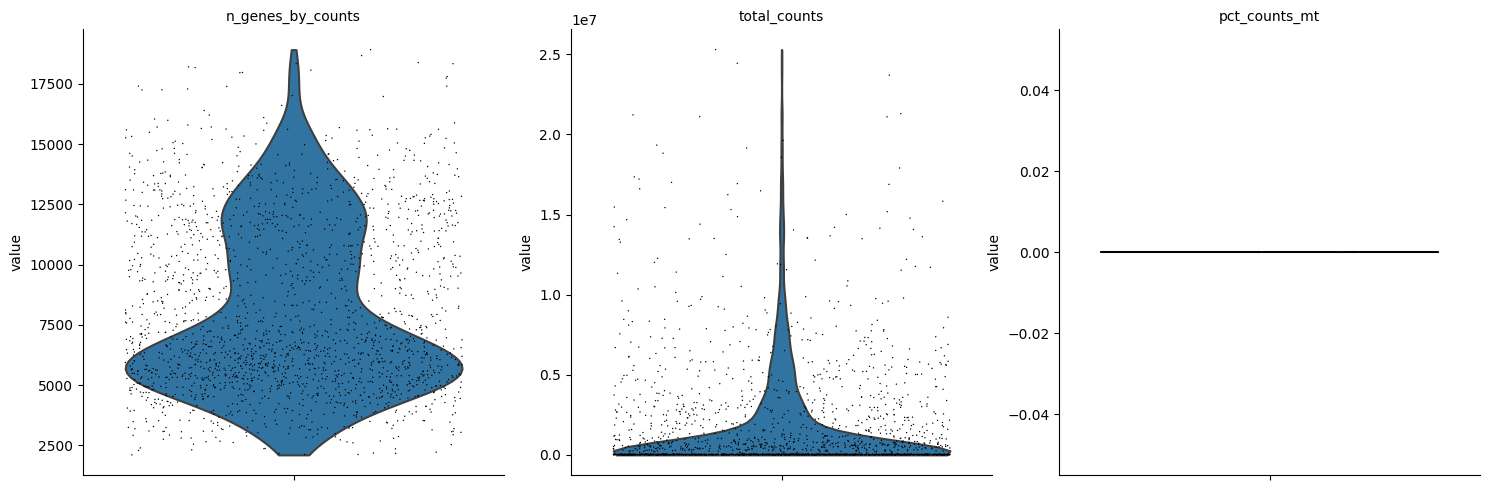

<Axes: xlabel='total_counts', ylabel='n_genes_by_counts'>

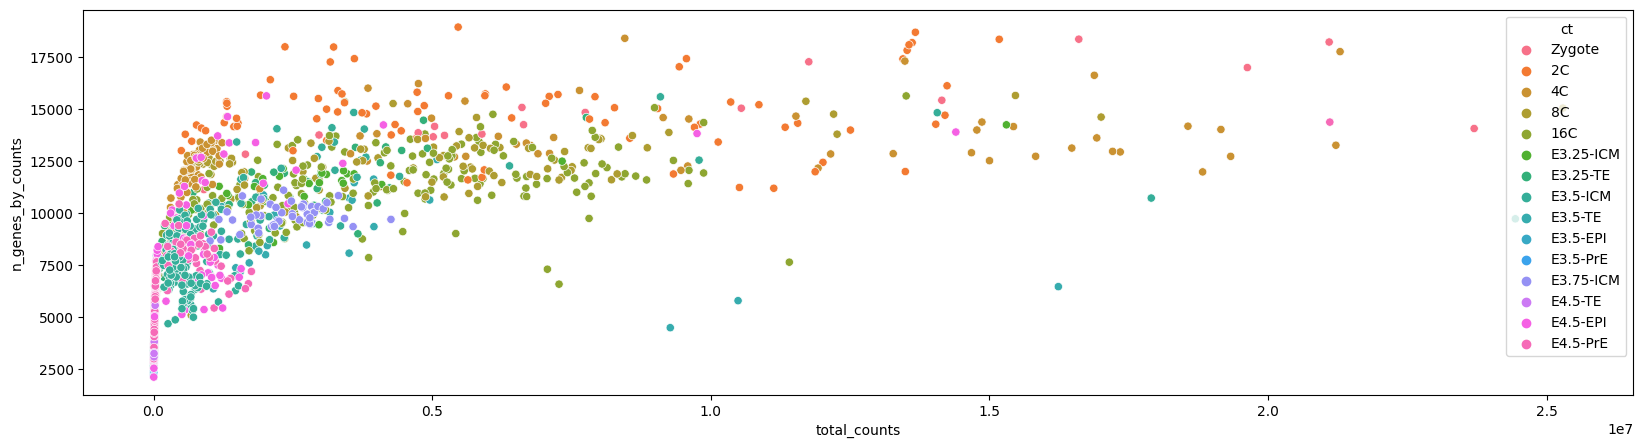

In [117]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

fig, ax = plt.subplots(figsize=(20, 5), sharey=True)
sns.scatterplot(
    x="total_counts", y="n_genes_by_counts", ax=ax, data=adata.obs, hue="ct"
)
# plt.axvline(x=26_000_000, c='r', linestyle='--')

In [118]:
adata.layers["counts"] = adata.X.copy()

sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
adata.raw = adata

adata

AnnData object with n_obs × n_vars = 2004 × 34346
    obs: 'batch', 'experiment', 'technology', 'ct', 'ct_orig', 'stage', 'timepoint', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'n_counts'
    var: 'gene_ids', 'gene_symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'log1p'
    layers: 'counts'

In [119]:
adata.write("../data/processed/01_mouse_reprocessed.h5ad")

/projects/dan1/data/Brickman/conda/envs/scvi-1.0.0/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/projects/dan1/data/Brickman/conda/envs/scvi-1.0.0/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/projects/dan1/data/Brickman/conda/envs/scvi-1.0.0/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/projects/dan1/data/Brickman/conda/envs/scvi-1.0.0/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


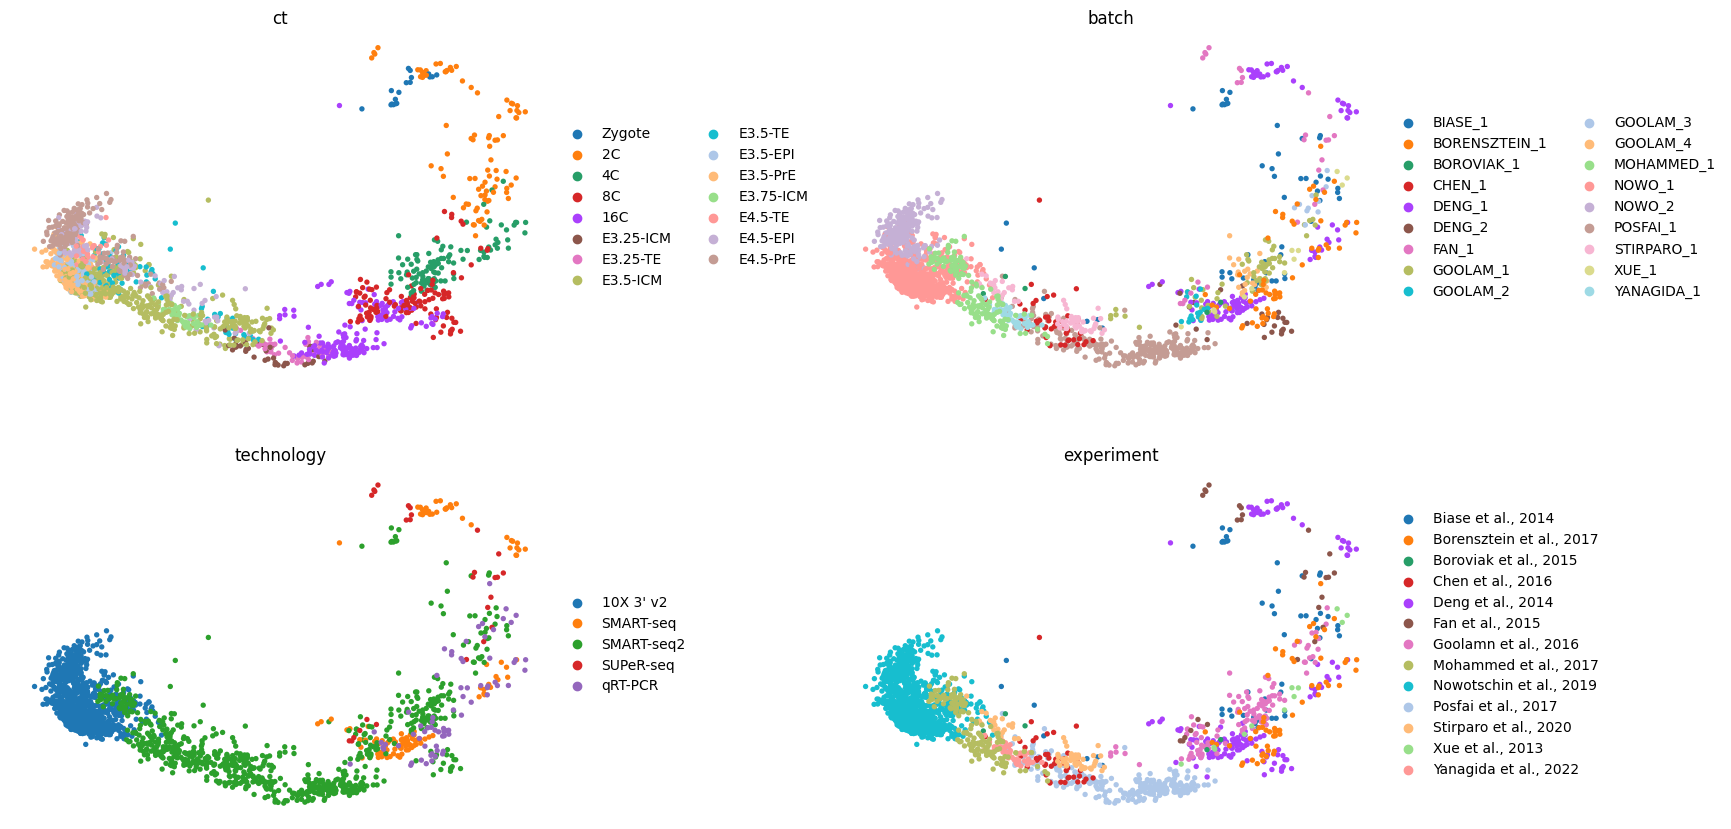

In [120]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color=['ct', 'batch', 'technology', 'experiment'], frameon=False, wspace=0.4, ncols=2)